In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pypvcell.solarcell import SQCell,MJCell
from pypvcell.illumination import Illumination

In [10]:
input_ill=Illumination("AM1.5g")

Text(0,0.5,'efficiency')

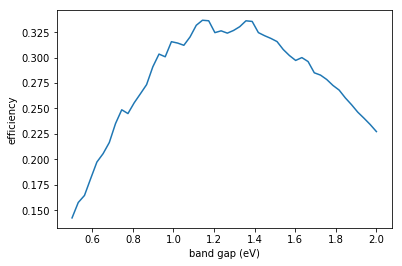

In [14]:
eg_array = np.linspace(0.5, 2.0)
eta_array_air_semi_class=[]
for eg in eg_array:
    sq_cell = SQCell(eg=eg, cell_T=293, n_c=1, n_s=1)
    sq_cell.set_input_spectrum(input_spectrum=input_ill)

    eta_array_air_semi_class.append(sq_cell.get_eta())

plt.plot(eg_array, eta_array_air_semi_class, label="nc=1,ns=1 (class)")
plt.xlabel("band gap (eV)")
plt.ylabel("efficiency")

## Calculate triple-junction cell with Germanium substrate

In [57]:
top_eg=np.linspace(1.6,2.2,num=20) # Set up range of top cell band gaps
mid_eg=np.linspace(0.9,1.55,num=20)# Set up range of top cell band gaps

eta=np.zeros((20,20)) # Initialize an array for storing efficiencies

ge_cell=SQCell(eg=0.67,cell_T=293)
for i,teg in enumerate(top_eg):
    for j,beg in enumerate(mid_eg):
        tc=SQCell(eg=teg,cell_T=293) # Set up top cell
        bc=SQCell(eg=beg,cell_T=293) # Set up bottom cell
        mj=MJCell([tc, bc,ge_cell]) # Make multijunction cell by "streaming" the 1J cells
        mj.set_input_spectrum(input_ill) # Set up the illumination
        eta[i,j]=mj.get_eta() # Store the calculated efficiency in an array

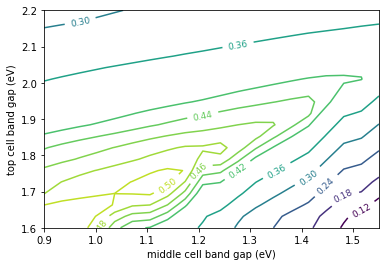

In [64]:
levels=np.unique(np.concatenate((np.arange(0.12,0.6,step=0.06),[0.44,0.46,0.48,0.50])))
cs=plt.contour(mid_eg,top_eg,eta,levels)
plt.clabel(cs,levels, fontsize=9, inline=1,fmt="%.2f")
plt.xlabel("middle cell band gap (eV)")
plt.ylabel("top cell band gap (eV)")
plt.savefig("3J_2d.pdf")

In [63]:
np.max(eta)

0.51431986275446451